# EDA

##### *Импортируем библиотеки*

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Считываем данныее с помощью пандаса

In [50]:
netflix_df = pd.read_csv('netflix_titles.csv')
netflix_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


Проверим наличие пропусков

In [51]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


Как мы видим - пропуски есть

##### *Разобьем наш датасет на категории: фильмы, сериалы*

In [52]:
netflix_movies = netflix_df[netflix_df['type']=='Movie'].copy()
nettflix_shows = netflix_df[netflix_df['type']=='TV Show'].copy()

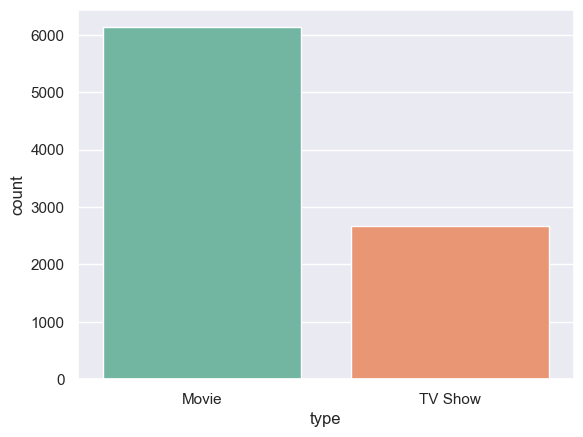

In [53]:
sns.set(style='darkgrid')
ax = sns.countplot(x='type',data=netflix_df, palette='Set2')

Фильмов представлено больше, чем сериалов

### Анализ фильмов

##### *В какие месяцы, лучшего всего выпускать контент*

Проверим, есть ли пропуски по дате добавления

In [54]:
netflix_movies.isna().sum()

show_id           0
type              0
title             0
director        188
cast            475
country         440
date_added        0
release_year      0
rating            2
duration          3
listed_in         0
description       0
dtype: int64

Возьмем признак даты добавления

In [78]:
netflix_date = netflix_movies[['date_added']].dropna()
netflix_date.isna().sum()

date_added    0
dtype: int64

In [79]:
netflix_date.head()


,date_added
0,"September 25, 2021"
6,"September 24, 2021"
7,"September 24, 2021"
9,"September 24, 2021"
12,"September 23, 2021"


Достанем месяц и год

In [86]:
netflix_date['year'] = netflix_date['date_added'].apply(lambda x: x.split(', ')[-1])
netflix_date['mounth'] = netflix_date['date_added'].apply(lambda x: x.lstrip().split(' ')[0])

In [87]:
netflix_date

,date_added,year,mounth
0,"September 25, 2021",2021,September
6,"September 24, 2021",2021,September
7,"September 24, 2021",2021,September
9,"September 24, 2021",2021,September
12,"September 23, 2021",2021,September
...,...,...,...
8801,"March 9, 2016",2016,March
8802,"November 20, 2019",2019,November
8804,"November 1, 2019",2019,November
8805,"January 11, 2020",2020,January


In [88]:
netflix_date.sort_values(by=['year', 'mounth'])

,date_added,year,mounth
5957,"January 1, 2008",2008,January
5956,"May 5, 2009",2009,May
5955,"November 18, 2009",2009,November
7370,"November 1, 2010",2010,November
5954,"May 17, 2011",2011,May
...,...,...,...
177,"September 1, 2021",2021,September
178,"September 1, 2021",2021,September
179,"September 1, 2021",2021,September
180,"September 1, 2021",2021,September


In [96]:
mounth_ordered = ['Ja', 'Fe', 'Ma', 'Ap', 'May', 'June', 'July', 'Au', 'Sept', 'Oc', 'No', 'De']
df_date = netflix_date.groupby('year')['mounth'].value_counts().unstack().fillna(0).T

In [99]:
df_date

year,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
mounth,,,,,,,,,,,,,,
April,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,14.0,66.0,87.0,119.0,127.0,135.0
August,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,23.0,77.0,130.0,87.0,82.0,117.0
December,0.0,0.0,0.0,0.0,1.0,2.0,5.0,14.0,52.0,80.0,124.0,168.0,101.0,0.0
February,0.0,0.0,0.0,0.0,1.0,0.0,1.0,3.0,9.0,65.0,63.0,103.0,72.0,65.0
January,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,15.0,58.0,105.0,116.0,152.0,96.0
July,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,19.0,45.0,125.0,98.0,103.0,169.0
June,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,11.0,65.0,50.0,122.0,115.0,124.0
March,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,14.0,87.0,138.0,119.0,93.0,75.0
May,0.0,1.0,0.0,1.0,0.0,0.0,0.0,5.0,9.0,63.0,70.0,91.0,105.0,94.0


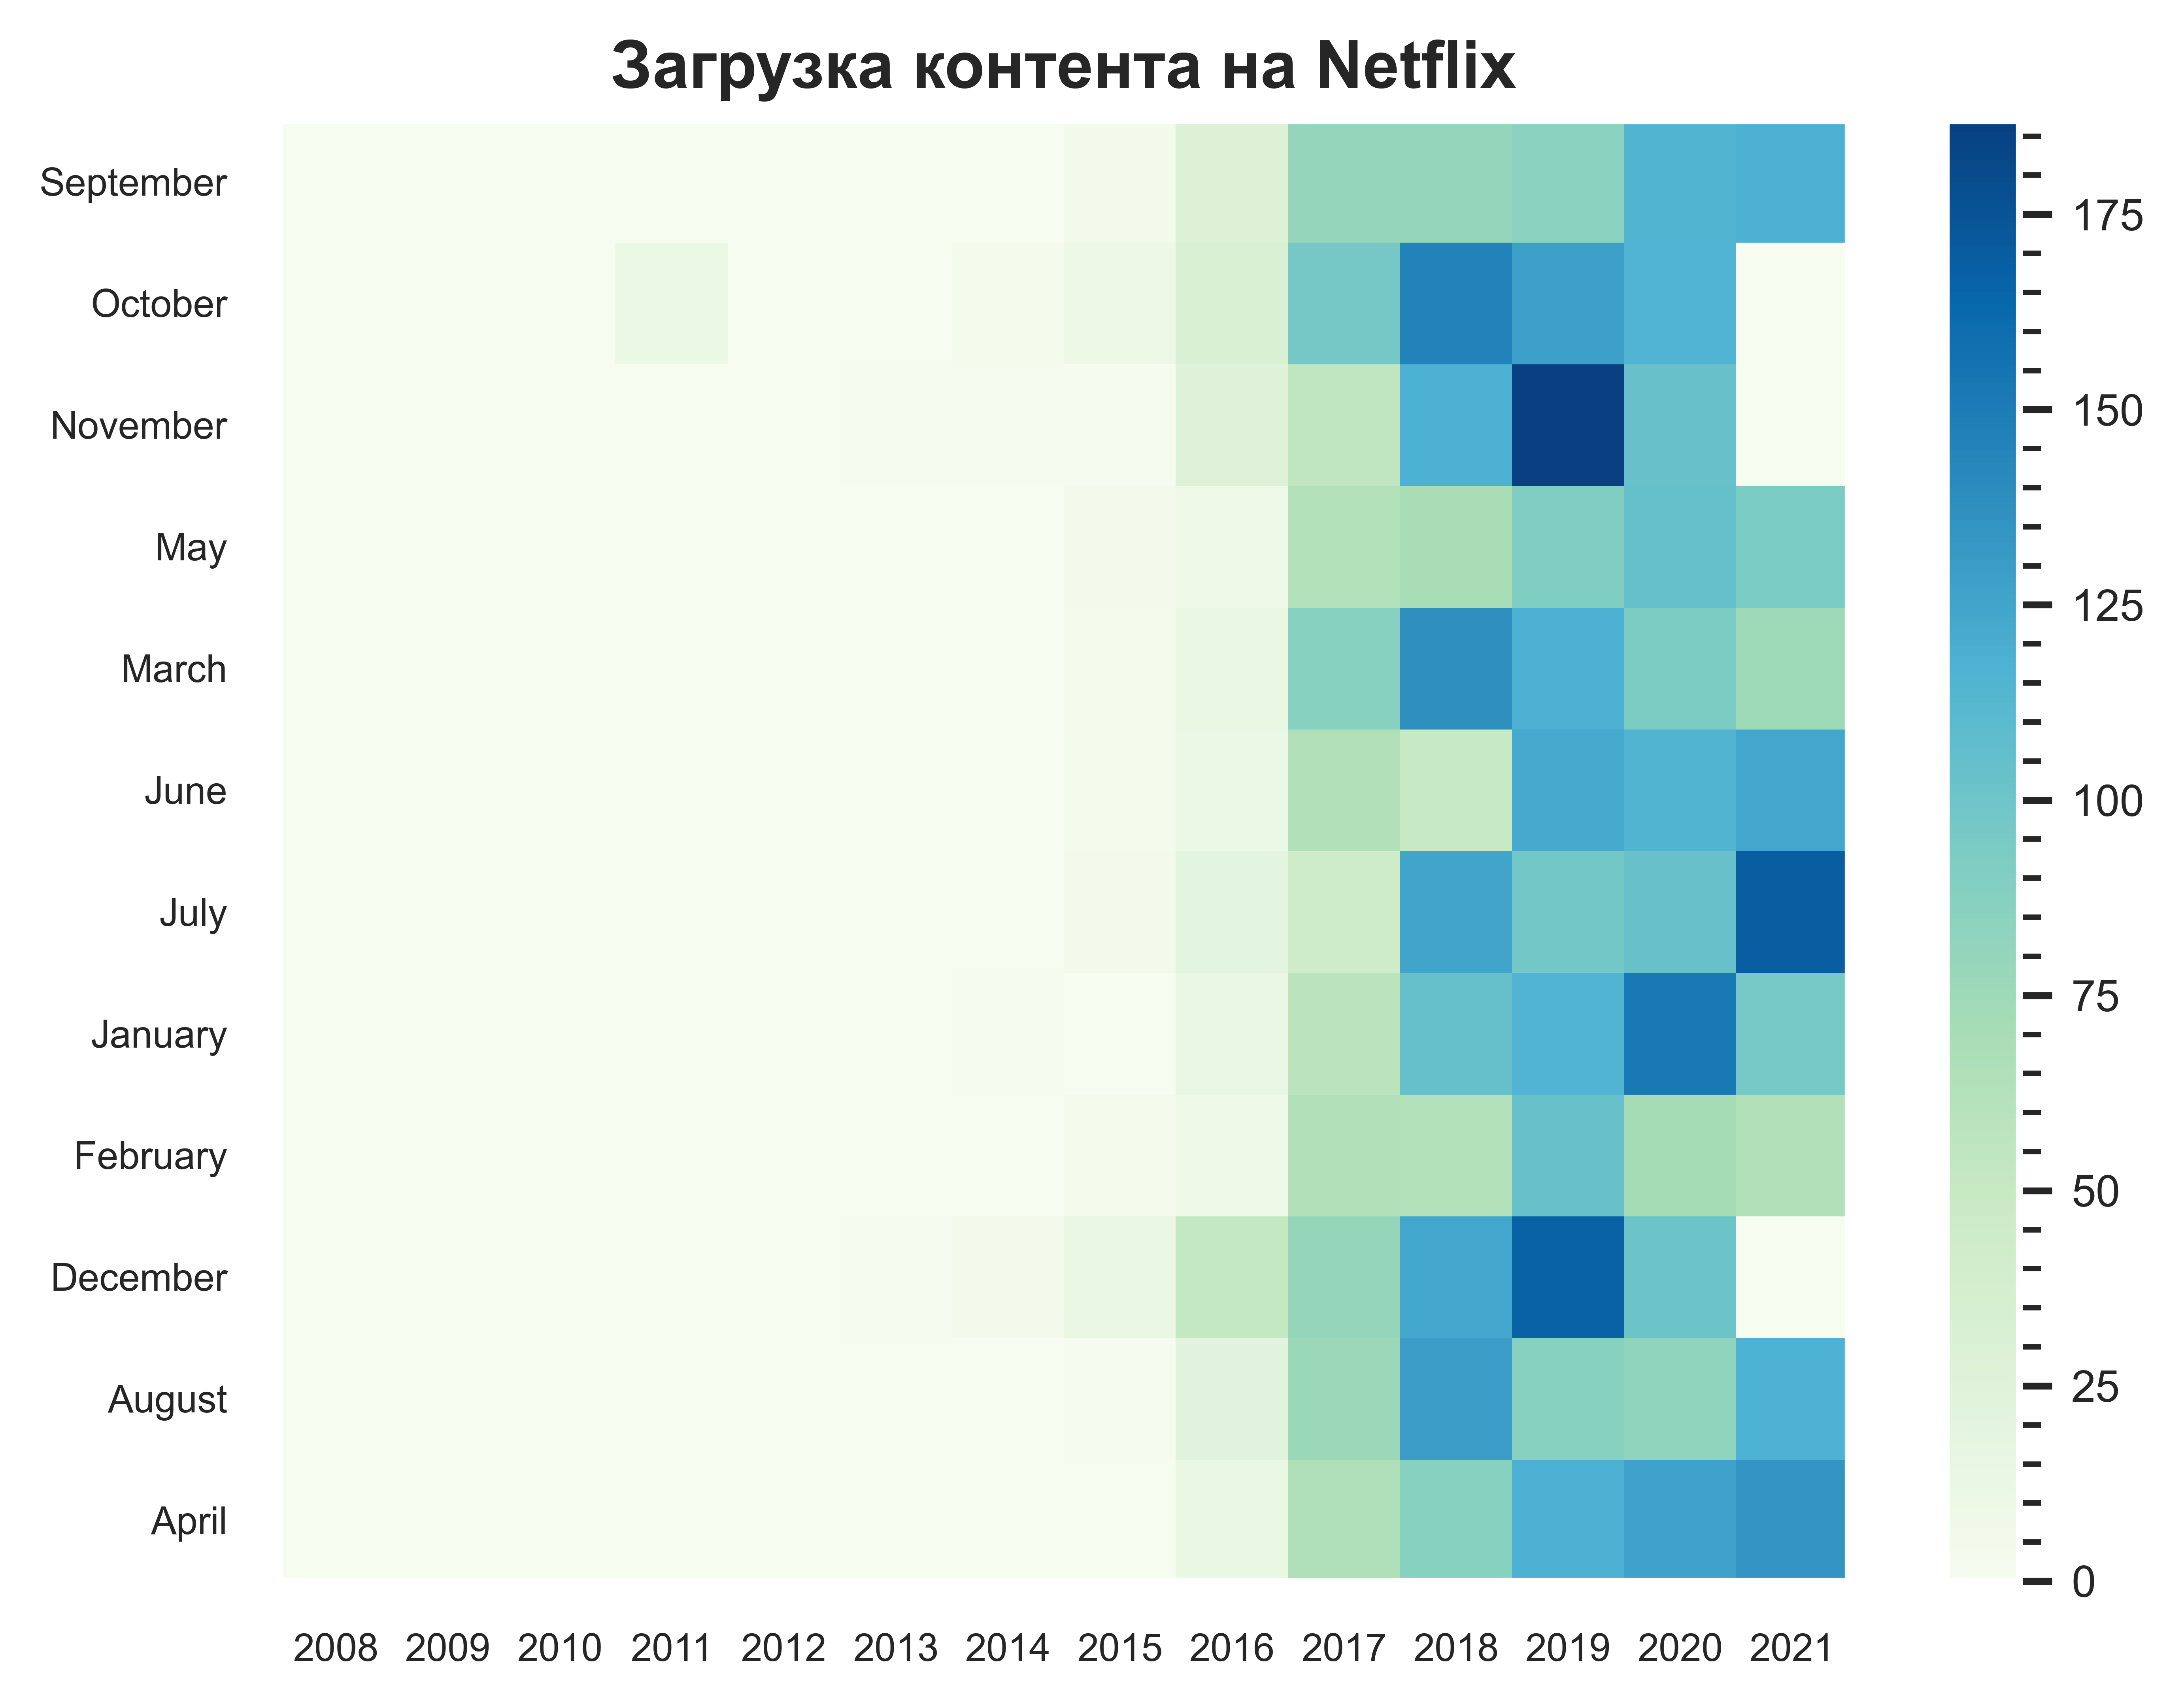

In [123]:
plt.figure(dpi=1000)
plt.pcolor(df_date, cmap='GnBu', linewidths=2)
plt.xticks(np.arange(0.5, len(df_date.columns),1), df_date.columns, fontsize=7)
plt.yticks(np.arange(0.5, len(df_date.index),1), df_date.index, fontsize=7)

plt.title('Загрузка контента на Netflix', fontsize=12, fontweight='bold')
cbar = plt.colorbar()

cbar.ax.tick_params(labelsize=8)
cbar.ax.minorticks_on()
plt.show()

Тепловая карта фильмов. Самые популярные - Ноябрь, Июль, Декабрь

##### *Посмотрим на возрастные рейтинги фильмов*

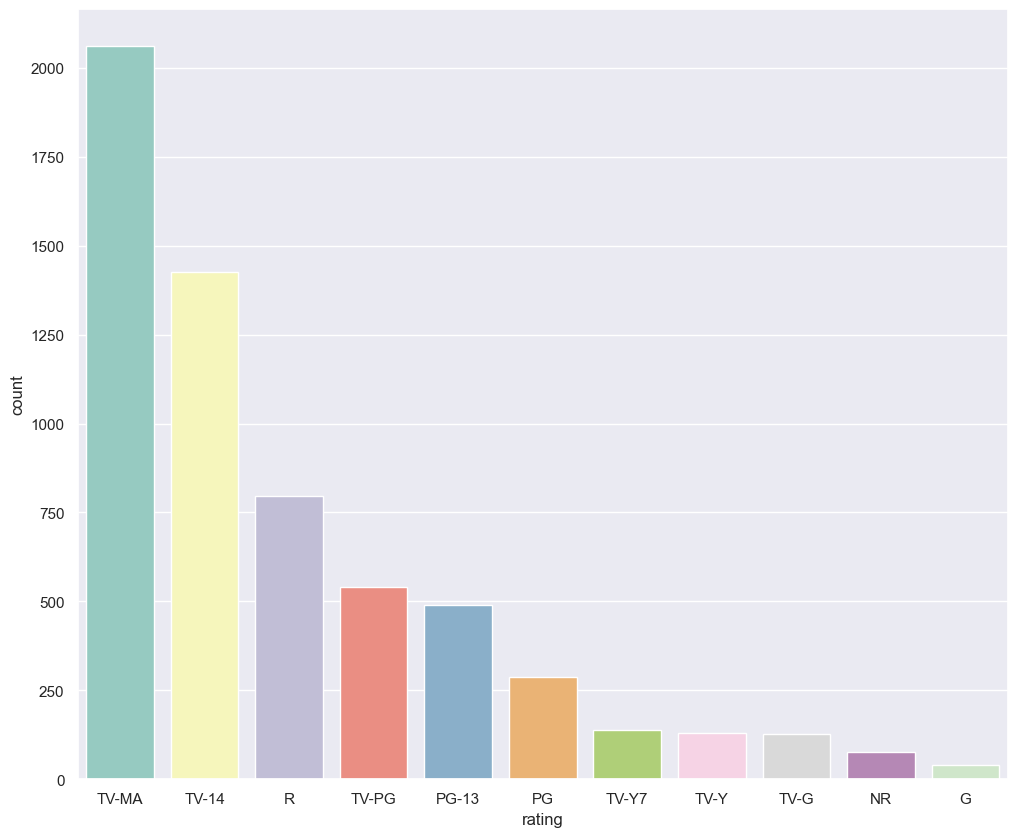

In [130]:
plt.figure(figsize=(12,10))
sns.set(style ='darkgrid')
ax = sns.countplot(x='rating', data=netflix_movies, palette='Set3', order=netflix_movies['rating'].value_counts().index[0:11])

Самые популярные рейтинги:

1. TV-MA - Только для взрослой аудитории

2. TV-14 - Контент от 14 лет

3. R - Фильмы от 17 лет

##### *Посмотрим на резил фильма*

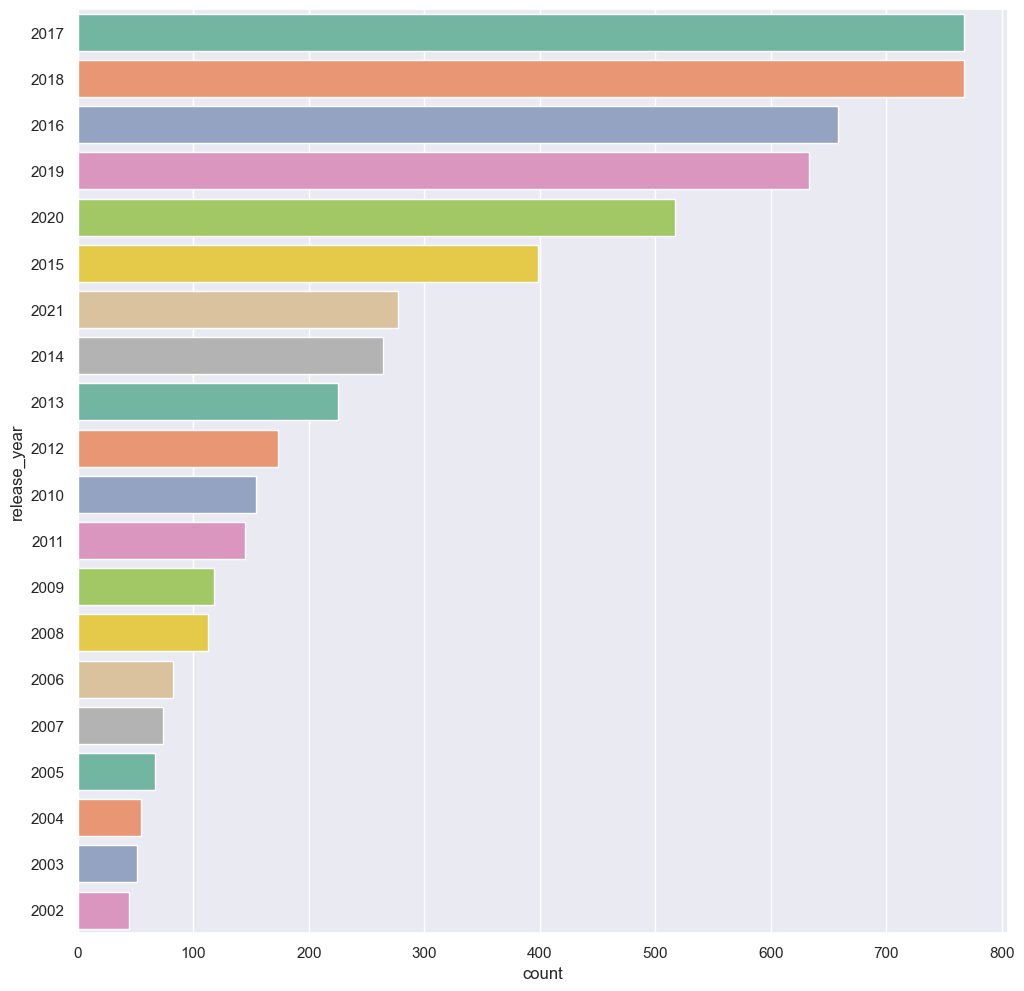

In [137]:
plt.figure(figsize=(12,12))
sns.set(style ='darkgrid')
ax = sns.countplot(y='release_year', data=netflix_movies, palette='Set2', order=netflix_movies['release_year'].value_counts().index[0:20])

Самые популяррныее: 2017, 2018 г.

##### *Какие страны чаще всего выпускают фильмы?*

In [139]:
netflix_movies.isna().sum()

show_id           0
type              0
title             0
director        188
cast            475
country         440
date_added        0
release_year      0
rating            2
duration          3
listed_in         0
description       0
dtype: int64

В странах 440 пропусков. Заполним их на Unknown

In [140]:
netflix_movies['country'].fillna('Unknown', inplace=True)
netflix_movies.isna().sum()

show_id           0
type              0
title             0
director        188
cast            475
country           0
date_added        0
release_year      0
rating            2
duration          3
listed_in         0
description       0
dtype: int64

In [141]:
netflix_movies['country'].value_counts()

United States                            2058
India                                     893
Unknown                                   440
United Kingdom                            206
Canada                                    122
                                         ... 
United Kingdom, Russia, United States       1
Paraguay, Argentina                         1
United Kingdom, Malawi                      1
Austria, Iraq, United States                1
United Arab Emirates, Jordan                1
Name: country, Length: 652, dtype: int64

In [146]:
countries_mov = {}
cou = list(netflix_movies['country'])
for i in cou:
    i = i.replace(' ', '')
    i = list(i.split(','))
    
    for j in i:
        if j in list(countries_mov.keys()):
            countries_mov[j] += 1
        else:
            countries_mov[j] = 1

In [144]:
countries_mov

{'UnitedStates': 2752,
 'Unknown': 440,
 'Ghana': 5,
 'BurkinaFaso': 1,
 'UnitedKingdom': 534,
 'Germany': 182,
 'Ethiopia': 1,
 'CzechRepublic': 16,
 'India': 962,
 'France': 303,
 'China': 114,
 'Canada': 319,
 'SouthAfrica': 51,
 'Japan': 119,
 'Nigeria': 94,
 'Spain': 171,
 'Australia': 94,
 'Mexico': 111,
 'Italy': 75,
 'Romania': 14,
 'Argentina': 71,
 'Venezuela': 4,
 'HongKong': 100,
 'Nepal': 2,
 'NewZealand': 25,
 'Brazil': 66,
 'Greece': 9,
 'Colombia': 20,
 'Belgium': 78,
 'Switzerland': 18,
 'Bulgaria': 10,
 '': 6,
 'Algeria': 3,
 'Poland': 32,
 'Israel': 19,
 'SaudiArabia': 9,
 'Thailand': 46,
 'Indonesia': 86,
 'Egypt': 102,
 'Denmark': 34,
 'Kuwait': 5,
 'Netherlands': 42,
 'Singapore': 18,
 'Malaysia': 18,
 'SouthKorea': 61,
 'Vietnam': 7,
 'Hungary': 10,
 'Lebanon': 24,
 'Syria': 2,
 'Philippines': 80,
 'UnitedArabEmirates': 36,
 'Sweden': 31,
 'Qatar': 10,
 'Mauritius': 1,
 'Austria': 11,
 'Turkey': 83,
 'Russia': 11,
 'Taiwan': 19,
 'Cameroon': 1,
 'Palestine': 1,
 

In [149]:
countries_fin = sorted(countries_mov.items(), key=lambda item: countries_mov[item[0]], reverse=True)

In [150]:
countries_fin

[('UnitedStates', 2752),
 ('India', 962),
 ('UnitedKingdom', 534),
 ('Unknown', 440),
 ('Canada', 319),
 ('France', 303),
 ('Germany', 182),
 ('Spain', 171),
 ('Japan', 119),
 ('China', 114),
 ('Mexico', 111),
 ('Egypt', 102),
 ('HongKong', 100),
 ('Nigeria', 94),
 ('Australia', 94),
 ('Indonesia', 86),
 ('Turkey', 83),
 ('Philippines', 80),
 ('Belgium', 78),
 ('Italy', 75),
 ('Argentina', 71),
 ('Brazil', 66),
 ('SouthKorea', 61),
 ('SouthAfrica', 51),
 ('Thailand', 46),
 ('Netherlands', 42),
 ('UnitedArabEmirates', 36),
 ('Denmark', 34),
 ('Poland', 32),
 ('Ireland', 32),
 ('Sweden', 31),
 ('NewZealand', 25),
 ('Lebanon', 24),
 ('Chile', 24),
 ('Norway', 21),
 ('Colombia', 20),
 ('Pakistan', 20),
 ('Israel', 19),
 ('Taiwan', 19),
 ('Switzerland', 18),
 ('Singapore', 18),
 ('Malaysia', 18),
 ('CzechRepublic', 16),
 ('Romania', 14),
 ('Uruguay', 13),
 ('Austria', 11),
 ('Russia', 11),
 ('Bulgaria', 10),
 ('Hungary', 10),
 ('Qatar', 10),
 ('Luxembourg', 10),
 ('Peru', 10),
 ('Greece', 9

In [166]:
names_countrie = [name for name, value in countries_fin[:15]]

In [167]:
values_countries = [value for name, value in countries_fin[:15]]

[Text(0, 0, 'UnitedStates'),
 Text(1, 0, 'India'),
 Text(2, 0, 'UnitedKingdom'),
 Text(3, 0, 'Unknown'),
 Text(4, 0, 'Canada'),
 Text(5, 0, 'France'),
 Text(6, 0, 'Germany'),
 Text(7, 0, 'Spain'),
 Text(8, 0, 'Japan'),
 Text(9, 0, 'China'),
 Text(10, 0, 'Mexico'),
 Text(11, 0, 'Egypt'),
 Text(12, 0, 'HongKong'),
 Text(13, 0, 'Nigeria'),
 Text(14, 0, 'Australia')]

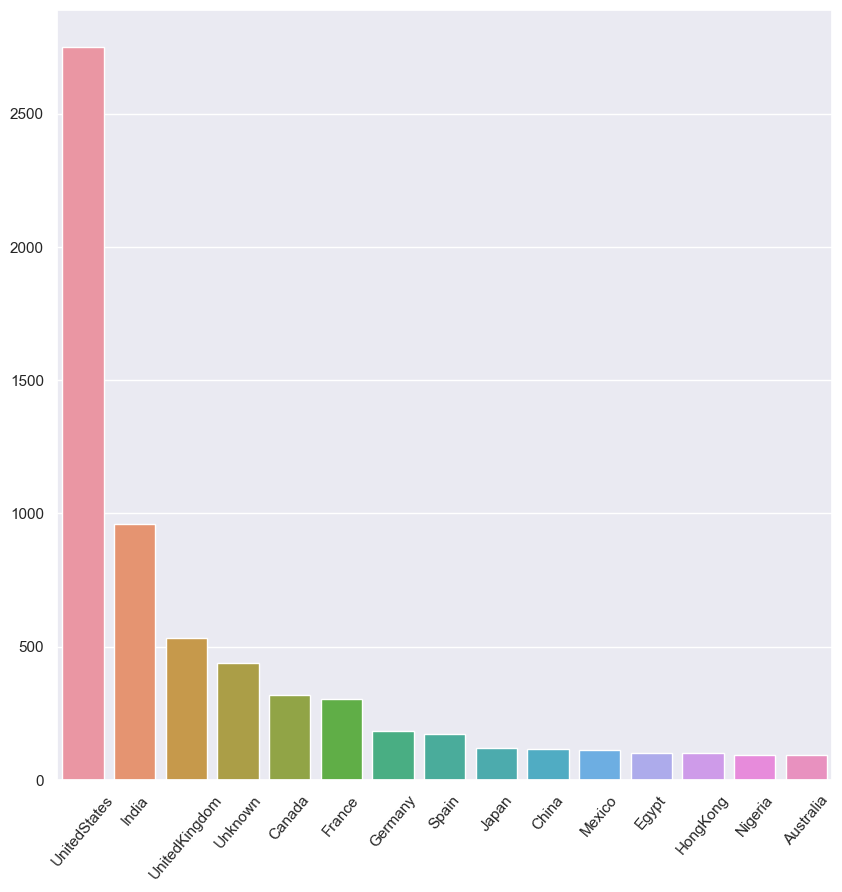

In [168]:
plt.figure(figsize=(10,10))
ax = sns.barplot(x=names_countrie, y=values_countries)
ax.set_xticklabels(names_countrie,rotation=50)

##### *Какие жанры чаще всего имеют фильмы?*

In [172]:
netflix_movies['listed_in']

0                                          Documentaries
6                               Children & Family Movies
7       Dramas, Independent Movies, International Movies
9                                       Comedies, Dramas
12                          Dramas, International Movies
                              ...                       
8801             Dramas, International Movies, Thrillers
8802                      Cult Movies, Dramas, Thrillers
8804                             Comedies, Horror Movies
8805                  Children & Family Movies, Comedies
8806      Dramas, International Movies, Music & Musicals
Name: listed_in, Length: 6131, dtype: object

In [185]:
from collections import Counter
gen = list()
genres = list(netflix_movies['listed_in'])
for i in genres:
    i = list(i.split(','))
    
    for j in i:
        gen.append(j.replace(' ',''))
    
    g = Counter(gen)
              

In [186]:
g

Counter({'Documentaries': 869,
         'Children&FamilyMovies': 641,
         'Dramas': 2427,
         'IndependentMovies': 756,
         'InternationalMovies': 2752,
         'Comedies': 1674,
         'Thrillers': 577,
         'RomanticMovies': 616,
         'Music&Musicals': 375,
         'HorrorMovies': 357,
         'Sci-Fi&Fantasy': 243,
         'Action&Adventure': 859,
         'ClassicMovies': 116,
         'AnimeFeatures': 71,
         'SportsMovies': 219,
         'CultMovies': 71,
         'Faith&Spirituality': 65,
         'LGBTQMovies': 102,
         'Stand-UpComedy': 343,
         'Movies': 57})

In [187]:
g_film = sorted(g.items(), key=lambda item: g[item[0]], reverse=True)

In [188]:
g_film

[('InternationalMovies', 2752),
 ('Dramas', 2427),
 ('Comedies', 1674),
 ('Documentaries', 869),
 ('Action&Adventure', 859),
 ('IndependentMovies', 756),
 ('Children&FamilyMovies', 641),
 ('RomanticMovies', 616),
 ('Thrillers', 577),
 ('Music&Musicals', 375),
 ('HorrorMovies', 357),
 ('Stand-UpComedy', 343),
 ('Sci-Fi&Fantasy', 243),
 ('SportsMovies', 219),
 ('ClassicMovies', 116),
 ('LGBTQMovies', 102),
 ('AnimeFeatures', 71),
 ('CultMovies', 71),
 ('Faith&Spirituality', 65),
 ('Movies', 57)]

In [189]:
genre_name = [name for name, value in g_film]
genre_value = [value for name, value in g_film]

Text(0.5, 1.0, 'Жанры')

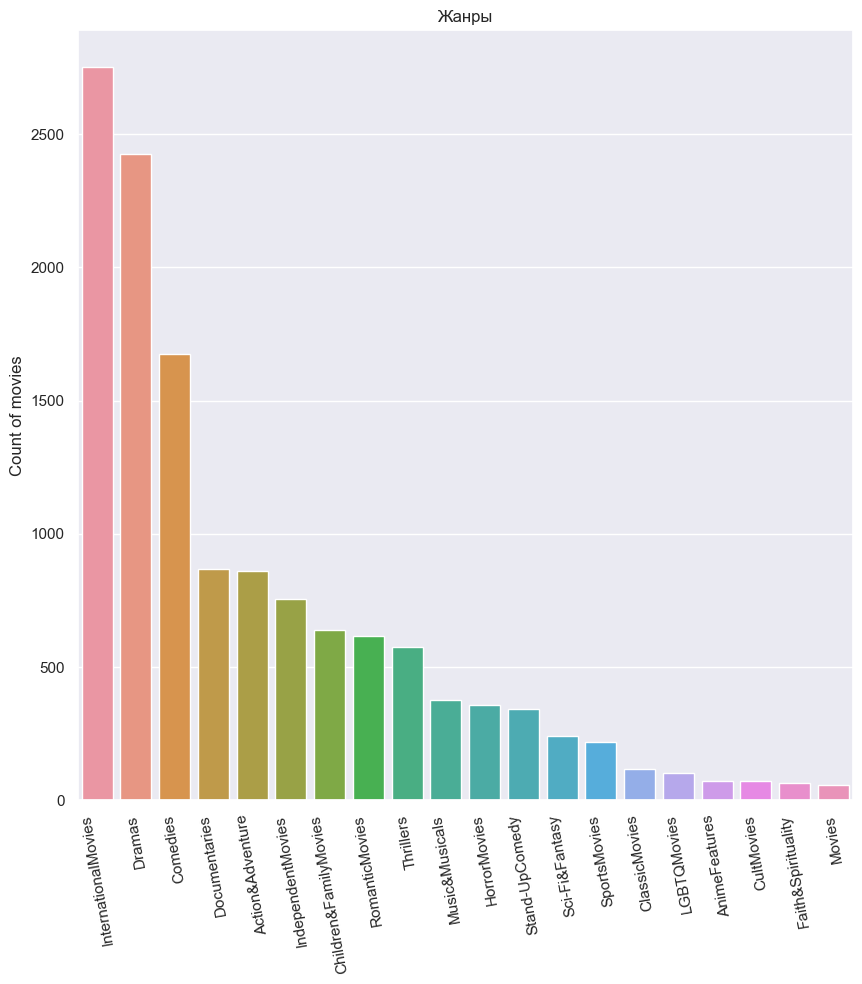

In [194]:
fig = plt.figure(figsize = (10,10))
ax =sns.barplot(x=genre_name, y=genre_value)

ax.set_xticklabels(genre_name, rotation=100)
ax.set_ylabel('Count of movies')
ax.set_title('Жанры')